In [ ]:
!pip install matplotlib scikit-learn keras

In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [7]:
df =  pd.read_csv("creditcard.csv")

C:\Users\adity\AppData\Local\Temp\ipykernel_19596\2107955042.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


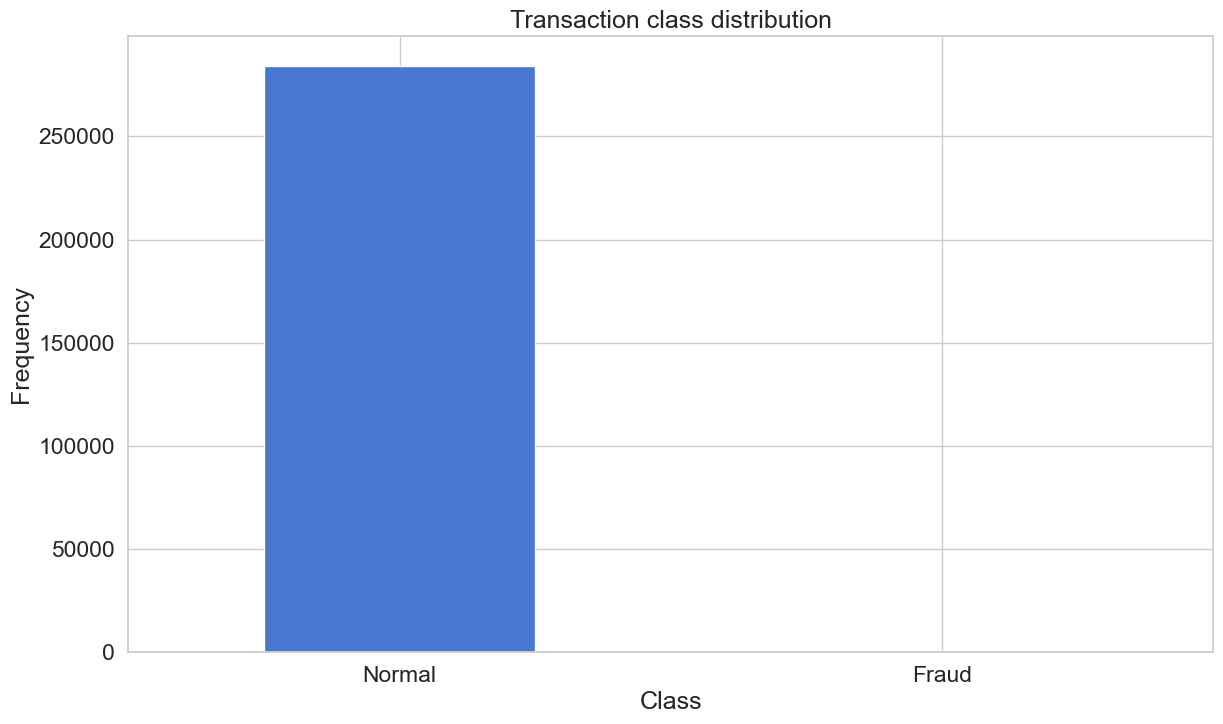

In [8]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [9]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))


In [10]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [11]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [12]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [14]:

nb_epoch = 10
batch_size = 32
early_stop = tf.keras.callbacks. EarlyStopping( monitor= 'val_loss', min_delta=0.0001, patience=10, verbose=1, mode='min',
                                               restore_best_weights=True)

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, early_stop]).history

Epoch 1/10
7094/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 0.7430

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6805 - loss: 0.7210 - val_accuracy: 0.6797 - val_loss: 0.7578
Epoch 2/10
7084/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 0.7481

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6815 - loss: 0.7204 - val_accuracy: 0.6821 - val_loss: 0.7540
Epoch 3/10
7097/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - loss: 0.7182

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6819 - loss: 0.7201 - val_accuracy: 0.6824 - val_loss: 0.7539
Epoch 4/10
7100/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.7311

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6821 - loss: 0.7200 - val_accuracy: 0.6834 - val_loss: 0.7538
Epoch 5/10
7087/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - loss: 0.7159

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6825 - loss: 0.7197 - val_accuracy: 0.6855 - val_loss: 0.7529
Epoch 6/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6812 - loss: 0.7194 - val_accuracy: 0.6787 - val_loss: 0.7570
Epoch 7/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6804 - loss: 0.7187 - val_accuracy: 0.6795 - val_loss: 0.7531
Epoch 8/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.6809 - loss: 0.7184 - val_accuracy: 0.6778 - val_loss: 0.7571
Epoch 9/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.6818 - loss: 0.7184 - val_accuracy: 0.6787 - val_loss: 0.7533
Epoch 10/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6813 - loss: 0.7175 - val_accuracy: 0.6778 - val_loss: 0.7608
Restoring model weights from the end of the best epoch: 5.


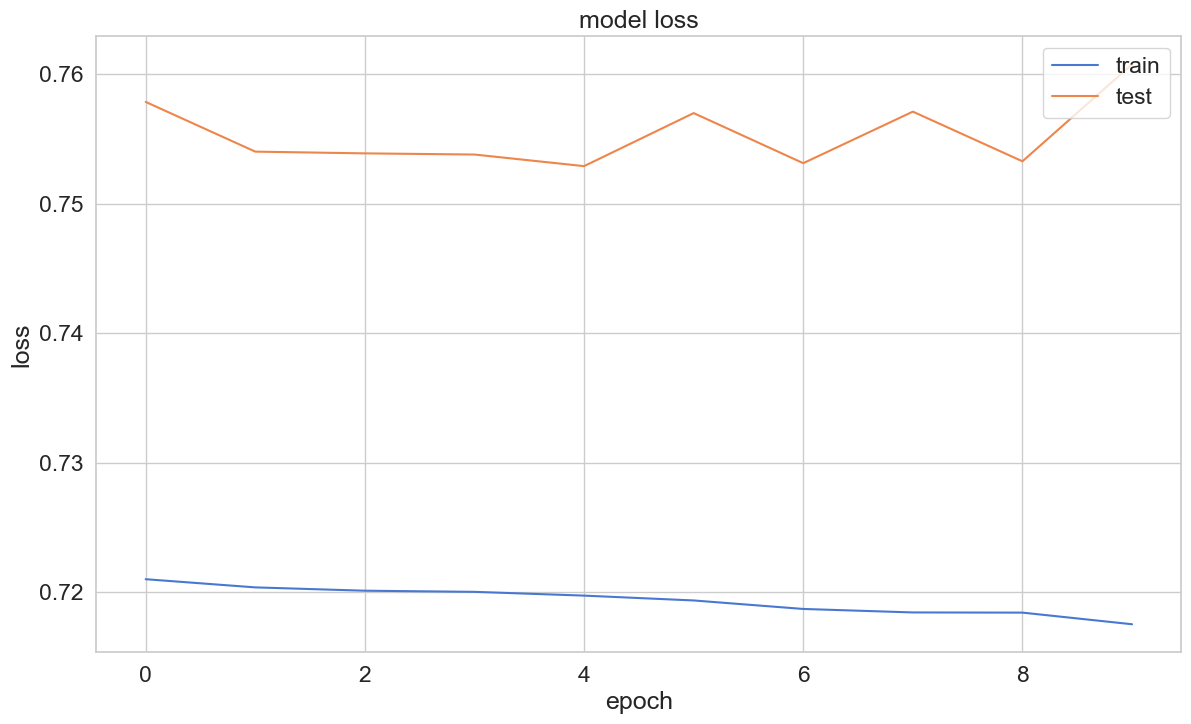

In [15]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [16]:
predictions = autoencoder.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step


In [17]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [18]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.746231,0.001720
std,3.481018,0.041443
min,0.033456,0.000000
25%,0.254828,0.000000
50%,0.395502,0.000000
75%,0.622282,0.000000
max,282.858717,1.000000


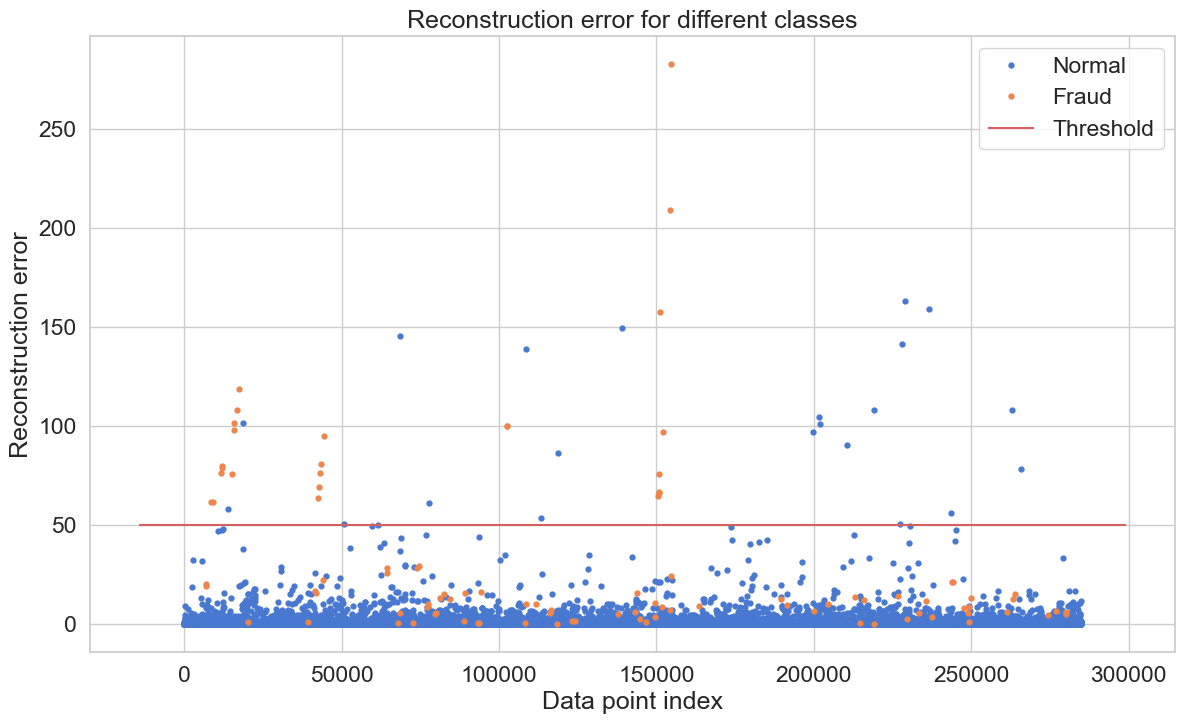

In [19]:
threshold = 50
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [20]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score

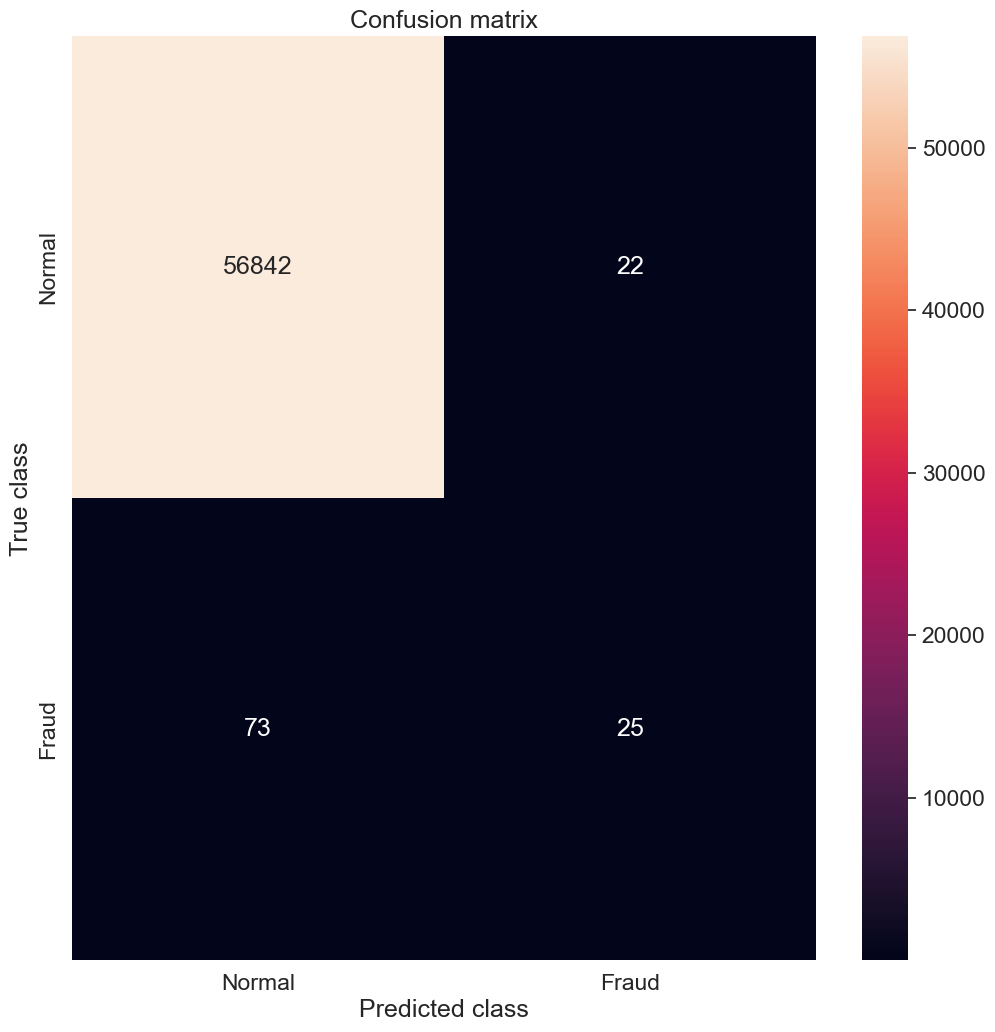

In [21]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [22]:
error_df['pred'] = y_pred

In [23]:
# print Accuracy, precision and recall print(" Accuracy:

print("Accuracy:",accuracy_score (error_df['true_class'],error_df['pred']))
print(" Recall:",recall_score(error_df['true_class'],error_df['pred']))
print(" Precision:",precision_score(error_df['true_class'],error_df['pred']))

Accuracy: 0.9983322214809873
 Recall: 0.25510204081632654
 Precision: 0.5319148936170213
